In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

In [2]:
db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

# SQL Project
The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.

**Task:**<div>
You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

# Description of the data

**`books`**

Contains data on books:

- `book_id`
- `author_id`
- `title`
- `num_pages` — number of pages
- `publication_date`
- `publisher_id`

**`authors`**

Contains data on authors:

- `author_id`
- `author`

**`publishers`**

Contains data on publishers:

- `publisher_id`
- `publisher`

**`ratings`**

Contains data on user ratings:

- `rating_id`
- `book_id`
- `username` — the name of the user who rated the book
- `rating`

**`reviews`**

Contains data on customer reviews:

- `review_id`
- `book_id`
- `username` — the name of the user who reviewed the book
- `text` — the text of the review

# Data diagram

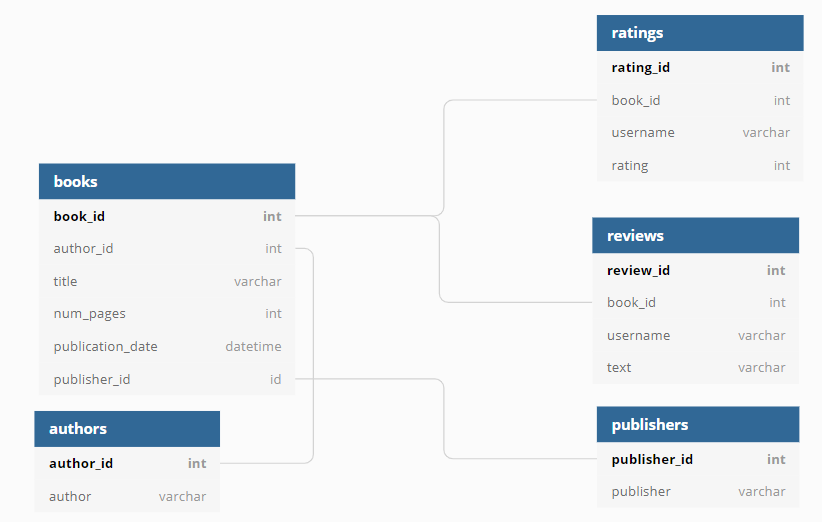

## Study the tables (print the first rows).

In [3]:
t=['books', 'authors', 'publishers', 'ratings', 'reviews']
for i in t:
    print('The {} table'.format(i))
    query = '''select * from {} limit 5'''.format(i)
    query2 = '''select count (*) from {} '''.format(i)
    display(pd.io.sql.read_sql(query, con = engine))
    print('')
    print('Number of rows')
    display(pd.io.sql.read_sql(query2, con = engine))
    print('-'*100)
    print('')

The books table


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268



Number of rows


,count
0,1000


----------------------------------------------------------------------------------------------------

The authors table


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd



Number of rows


,count
0,636


----------------------------------------------------------------------------------------------------

The publishers table


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company



Number of rows


,count
0,340


----------------------------------------------------------------------------------------------------

The ratings table


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2



Number of rows


,count
0,6456


----------------------------------------------------------------------------------------------------

The reviews table


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...



Number of rows


,count
0,2793


----------------------------------------------------------------------------------------------------



In [4]:
display(pd.io.sql.read_sql('''select * from books limit 5''', con = engine))
display(pd.io.sql.read_sql('''select count (*) from books ''', con = engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,count
0,1000


<b>Intermediate conclusions</b><br><br>
We have 5 tables in the DB:
1. **`books`** has 1000 rows each row representing 1 book
1. **`authors`** has 636 rows each row representing 1 author
1. **`publishers`** has 340 rows each row representing 1 publisher
1. **`ratings`** has 6456 rows each row representing 1 rating
1. **`reviews`** has 2793 rows each row representing 1 review

## - Find the number of books released after January 1, 2000.

In [5]:
pd.io.sql.read_sql('''
SELECT COUNT (*)
FROM books
WHERE publication_date > '2000-01-01';
''', con = engine)

,count
0,819


As we can see, 819 books were released after January 1, 2000.

## - Find the number of user reviews and the average rating for each book.

In [6]:
display(pd.io.sql.read_sql('''
    SELECT title,
    count(DISTINCT review_id) AS review_num,
    avg(rating) AS avg_rating
    FROM books AS b
    LEFT JOIN reviews AS r ON r.book_id = b.book_id
    LEFT JOIN ratings AS rt ON r.book_id = rt.book_id
    GROUP BY title
    ORDER BY COUNT (review_id) DESC;
''', con = engine))


display(pd.io.sql.read_sql('''
    WITH count as
    (SELECT title,
    count(DISTINCT review_id) AS review_num,
    avg(rating) AS avg_rating
    FROM books AS b
    LEFT JOIN reviews AS r ON r.book_id = b.book_id
    LEFT JOIN ratings AS rt ON r.book_id = rt.book_id
    GROUP BY title
    ORDER BY COUNT (review_id) DESC)
    SELECT SUM(review_num)
    FROM count;
''', con = engine))

,title,review_num,avg_rating
0,Twilight (Twilight #1),7,3.662500
1,The Hobbit or There and Back Again,6,4.125000
2,The Catcher in the Rye,6,3.825581
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634
4,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500
...,...,...,...
994,Disney's Beauty and the Beast (A Little Golden...,0,NaN
995,Essential Tales and Poems,0,NaN
996,Leonardo's Notebooks,0,NaN
997,The Natural Way to Draw,0,NaN


,sum
0,2793.0


In the table above we have average rating and the number of user reviews for each book, the table is sorted by the number of reviews in descending order

## - Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [7]:
display(pd.io.sql.read_sql('''
    SELECT p.publisher,
    count(*) AS book_num
    FROM books AS b
    LEFT JOIN publishers AS p ON b.publisher_id = p.publisher_id
    WHERE num_pages>50
    GROUP BY p.publisher
    ORDER BY COUNT (book_id) DESC
    LIMIT 1;
''', con = engine))

,publisher,book_num
0,Penguin Books,42


The publisher that has released the greatest number of books with more than 50 pages is Penguin Books with 42 books published

## - Identify the author with the highest average book rating (look only at books with at least 50 ratings).

In [8]:
display(pd.io.sql.read_sql(''' 
    WITH id AS
      (SELECT book_id,
              avg(rating)
       FROM ratings
       WHERE book_id in
           (SELECT book_id
            FROM ratings
            GROUP BY book_id
            HAVING count(rating_id) >= 50)
       GROUP BY book_id)
    SELECT author,
           count(id.book_id),
           round(avg(AVG), 2)
    FROM books AS b
    LEFT JOIN authors AS a ON b.author_id=a.author_id
    JOIN id ON id.book_id=b.book_id
    GROUP BY author
    ORDER BY avg(AVG) DESC
    LIMIT 1;
''', con = engine))

,author,count,round
0,J.K. Rowling/Mary GrandPré,4,4.28


The authors with the highest average book rating are J.K. Rowling/Mary GrandPré with average book rating of 4.29

## - Find the average number of text reviews among users who rated more than 50 books.

In [9]:
pd.io.sql.read_sql('''
    SELECT round(avg(text), 2)
    FROM
      (SELECT username,
              count(*) AS text
       FROM reviews
       WHERE username in
           (SELECT username
            FROM ratings
            GROUP BY username
            HAVING count(rating_id)>50)
       GROUP BY username) AS rt;
''', con = engine)

,round
0,24.33


The average number of text reviews among users who rated more than 50 books is 24.33 text reviews

## Conclusions<br><br>

<b>
    
1. **819 books were released after January 1, 2000** <br><br>
    
1. **[Here](#--Find-the-number-of-user-reviews-and-the-average-rating-for-each-book.) we have average rating and the number of user reviews for each book, the table is sorted by the number of reviews in descending order** <br><br>
    
1. **The publisher that has released the greatest number of books with more than 50 pages is Penguin Books with 42 books published**<br><br>
    
1. **The authors with the highest average book rating are J.K. Rowling/Mary GrandPré with average book rating of 4.29** <br><br>
    
1. **The average number of text reviews among users who rated more than 50 books is 24.33 text reviews** 
</b>